# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [26]:
!pip install pmdarima

In [28]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


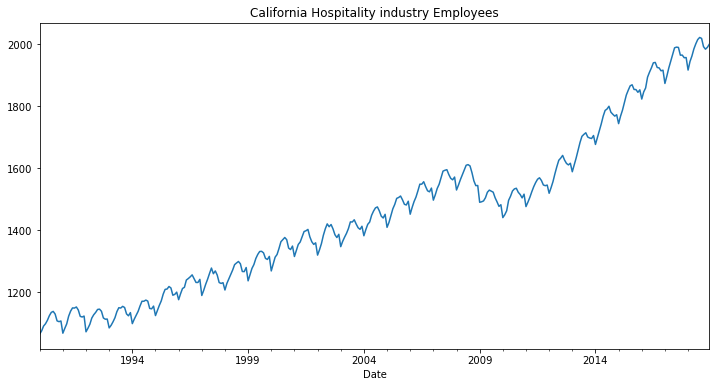

In [29]:

title = 'California Hospitality industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''
ax = df['Employees'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)


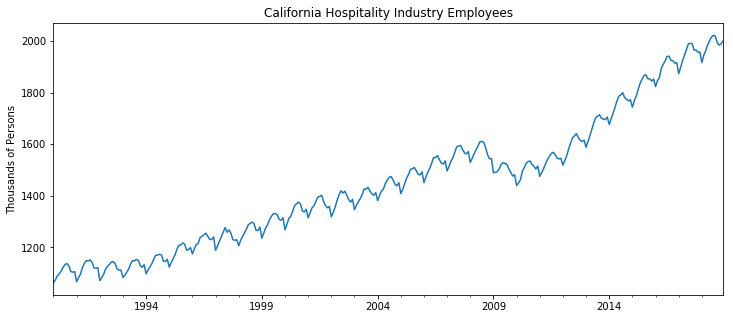

In [2]:
# 

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').

In [33]:
r = seasonal_decompose(df['Employees'],model='additive')

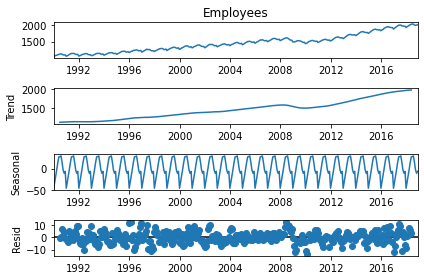

In [34]:
r.plot();

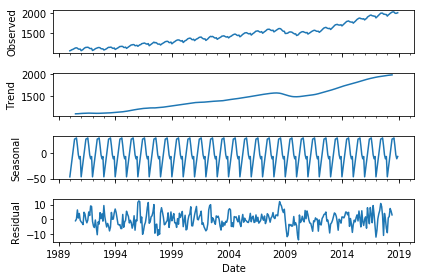

In [3]:
# 

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [37]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 19 Dec 2021   AIC                           2208.504
Time:                                      23:01:24   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9243      0.045     20.495      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.534      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.149      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    703.533      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.334      0.000      -0.834      -0.664
sigma2        29.2934      1.717     17.065      0.000      25.929      32.658
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
### 4. Разделите данные на train/test 
Установите один год (12 записей) для тестирования. Есть несколько способов сделать это!

In [38]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train

In [40]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Sun, 19 Dec 2021   AIC                           2196.814
Time:                                    23:02:20   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Sun, 19 Dec 2021   AIC                           2196.814
Time:                                    23:02:26   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [42]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

<AxesSubplot:xlabel='Date'>

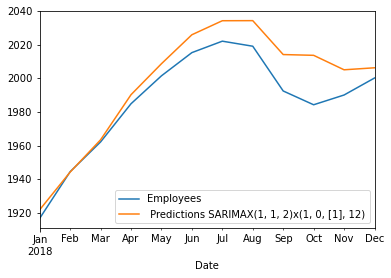

In [43]:
test['Employees'].plot(legend=True)
predictions.plot(legend=True)

### 7. Нарисуйте графики прогнозируемых и известных значений


[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

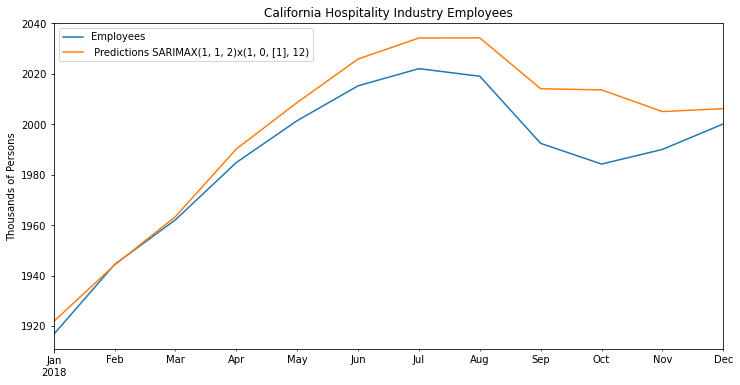

In [44]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = '' 
ax = test['Employees'].plot(legend=True, figsize=(12,6),title=title) 
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

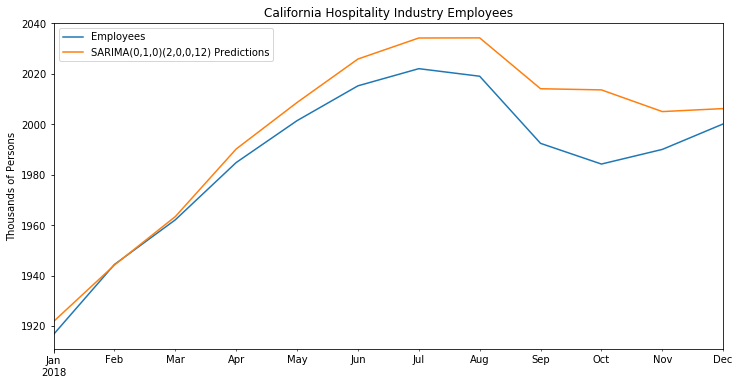

### 8. Оцените качество модели с помощью MSE и RMSE


In [45]:
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {error1:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {error2:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 182.8506642
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 13.52222852


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [46]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 19 Dec 2021   AIC                           2208.504
Time:                                      23:03:05   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9243      0.045     20.495      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.534      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.149      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    703.533      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.334      0.000      -0.834      -0.664
sigma2        29.2934      1.717     17.065      0.000      25.929      32.658
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) ')

### 10. Постройте график предсказаний и график исходных данных


<AxesSubplot:>

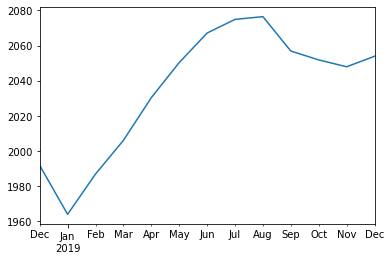

In [48]:
fcast.plot()
# df['Employees'][-1]

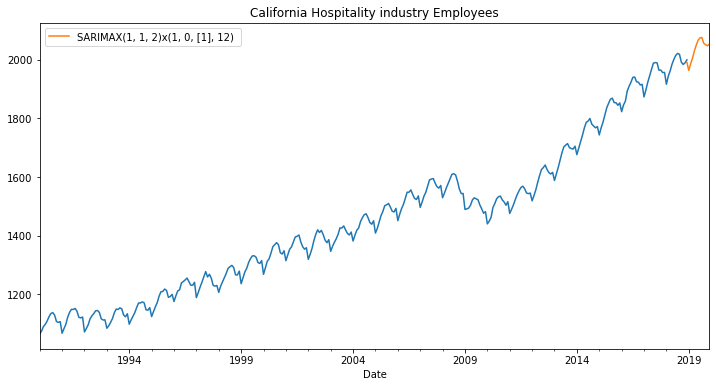

In [50]:
title = 'California Hospitality industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''
ax = df['Employees'].plot(figsize=(12,6),title=title)
fcast.plot(legend = True)
ax.autoscale(axis='x',tight=True)


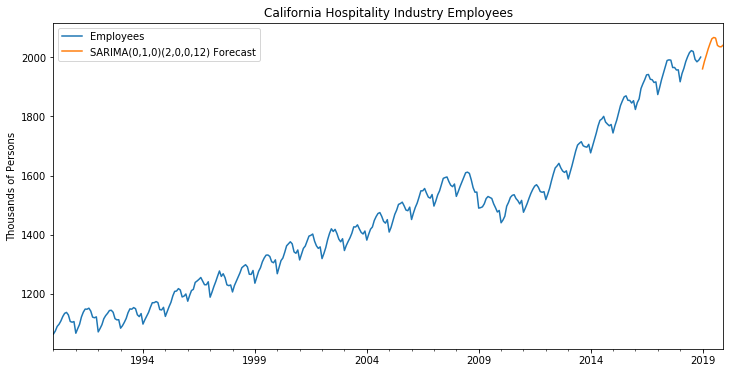

### BeerWineLiquor

In [58]:
df = pd.read_csv('BeerWineLiquor.csv',index_col='date', parse_dates=True)

In [59]:
df.head()

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [60]:
df.index.freq = 'MS' 
print(len(df))
print(df.head())

324
            beer
date            
1992-01-01  1509
1992-02-01  1541
1992-03-01  1597
1992-04-01  1675
1992-05-01  1822


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Сonsumption volume')]

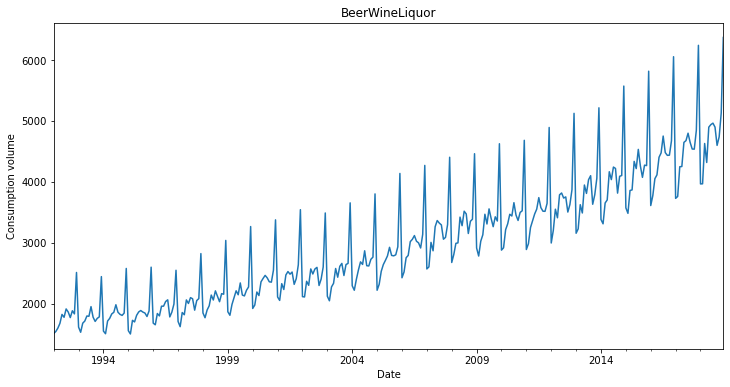

In [62]:
title = 'BeerWineLiquor' 
ylabel = 'Сonsumption volume' 
xlabel = 'Date' 

ax = df['beer'].plot(figsize=(12,6),title=title) 
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [63]:
r = seasonal_decompose(df['beer'],model='additive')

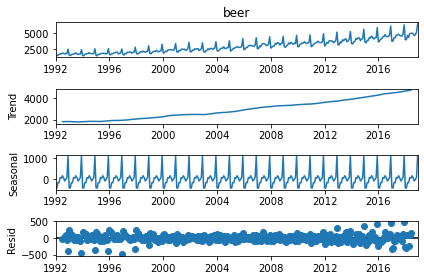

In [64]:
r.plot();

In [66]:
auto_arima(df['beer'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  324
Model:             SARIMAX(4, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -1774.560
Date:                              Sun, 19 Dec 2021   AIC                           3571.120
Time:                                      23:20:26   BIC                           3612.258
Sample:                                           0   HQIC                          3587.564
                                              - 324                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0149      0.086    -11.847      0.000      -1.183      -0.847
ar.L2         -0.5386      0.154     -3.501      0.000      -0.840      -0.237
ar.L3          0.4839      0.154      3.152      0.002       0.183       0.785
ar.L4          0.2966      0.086      3.436      0.001       0.127       0.466
ma.L1          0.2072      0.059      3.526      0.000       0.092       0.322
ma.L2         -0.0436      0.059     -0.739      0.460      -0.159       0.072
ma.L3         -0.8836      0.047    -18.976      0.000      -0.975      -0.792
ar.S.L12      -1.0096      0.383     -2.634      0.008      -1.761      -0.258
ar.S.L24      -0.2440      0.088     -2.769      0.006      -0.417      -0.071
ma.S.L12       0.7432      0.383      1.943      0.052      -0.007       1.493
sigma2      5825.4479    506.240     11.507      0.000    4833.236    6817.660
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.56
Prob(Q):                              0.67   Prob(JB):                         0.46
Heteroskedasticity (H):               2.06   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [68]:
model = SARIMAX(train['beer'],order=(4, 1, 3),seasonal_order=(2, 1, [1], 12))

results = model.fit() 

results.summary() 

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 beer   No. Observations:                  312
Model:             SARIMAX(4, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -1704.136
Date:                              Sun, 19 Dec 2021   AIC                           3430.273
Time:                                      23:33:59   BIC                           3470.978
Sample:                                  01-01-1992   HQIC                          3446.565
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9565      0.102     -9.413      0.000      -1.156      -0.757
ar.L2         -0.4633      0.169     -2.749      0.006      -0.794      -0.133
ar.L3          0.5420      0.166      3.263      0.001       0.216       0.868
ar.L4          0.2974      0.099      3.002      0.003       0.103       0.492
ma.L1          0.1850      0.076      2.438      0.015       0.036       0.334
ma.L2         -0.0570      0.075     -0.764      0.445      -0.203       0.089
ma.L3         -0.8671      0.056    -15.594      0.000      -0.976      -0.758
ar.S.L12       0.1140      0.601      0.190      0.850      -1.064       1.292
ar.S.L24      -0.0358      0.171     -0.210      0.834      -0.371       0.299
ma.S.L12      -0.3494      0.603     -0.579      0.562      -1.532       0.833
sigma2      6152.8273    597.107     10.304      0.000    4982.518    7323.136
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.67   Prob(JB):                         0.41
Heteroskedasticity (H):               1.97   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
start=len(train) 
end=len(train)+len(test)-1

In [70]:
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(4, 1, 3)x(2, 1, [1], 12)')

## Графики прогнозируемых и известных значений

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Сonsumption volume')]

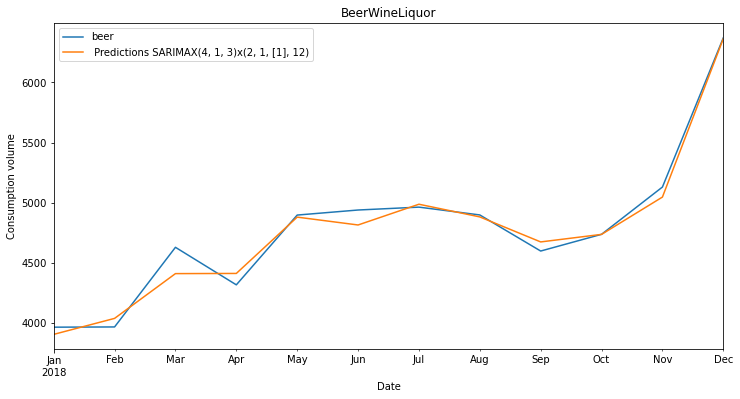

In [74]:
title = 'BeerWineLiquor' 
ylabel = 'Сonsumption volume' 
xlabel = 'Date' 
ax = test['beer'].plot(legend=True, figsize=(12,6),title=title) 
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [73]:
mse_error = mean_squared_error(test['beer'], predictions)
rmse_error = rmse(test['beer'], predictions)

print(f'SARIMAX(4, 1, 3)x(2, 1, [1], 12) MSE Error: {mse_error:11.10}') 
print(f'SARIMAX(4, 1, 3)x(2, 1, [1], 12) RMSE Error: {rmse_error:11.10}')

SARIMAX(4, 1, 3)x(2, 1, [1], 12) MSE Error: 7896.349498
SARIMAX(4, 1, 3)x(2, 1, [1], 12) RMSE Error: 88.86140612


Среднеквадратическая ошибка тестовой выборки составляет 88.86, можно считать допустимой 

### Прогноз

In [95]:
model = SARIMAX(df['beer'],order=(4, 1, 3),seasonal_order=(2, 1, [1], 12))
results = model.fit()
results.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 beer   No. Observations:                  324
Model:             SARIMAX(4, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -1774.560
Date:                              Mon, 20 Dec 2021   AIC                           3571.120
Time:                                      00:52:42   BIC                           3612.258
Sample:                                  01-01-1992   HQIC                          3587.564
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0149      0.086    -11.847      0.000      -1.183      -0.847
ar.L2         -0.5386      0.154     -3.501      0.000      -0.840      -0.237
ar.L3          0.4839      0.154      3.152      0.002       0.183       0.785
ar.L4          0.2966      0.086      3.436      0.001       0.127       0.466
ma.L1          0.2072      0.059      3.526      0.000       0.092       0.322
ma.L2         -0.0436      0.059     -0.739      0.460      -0.159       0.072
ma.L3         -0.8836      0.047    -18.976      0.000      -0.975      -0.792
ar.S.L12      -1.0096      0.383     -2.634      0.008      -1.761      -0.258
ar.S.L24      -0.2440      0.088     -2.769      0.006      -0.417      -0.071
ma.S.L12       0.7432      0.383      1.943      0.052      -0.007       1.493
sigma2      5825.4479    506.240     11.507      0.000    4833.236    6817.660
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.56
Prob(Q):                              0.67   Prob(JB):                         0.46
Heteroskedasticity (H):               2.06   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
fcast = results.predict(len(df)-1,len(df)+2,typ='levels').rename('SARIMAX(4, 1, 3)x(2, 1, [1], 12) Forecast')

<AxesSubplot:title={'center':'Прогноз на 3 мес'}>

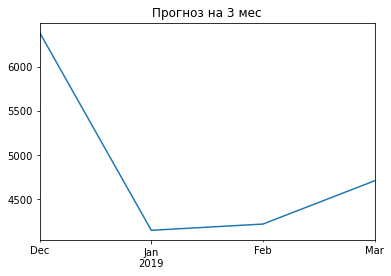

In [94]:
title = 'Прогноз на 3 мес'
fcast.plot(title=title)

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Сonsumption volume')]

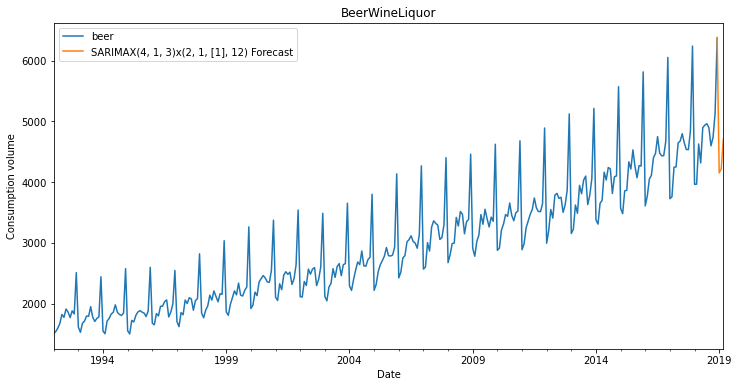

In [80]:
title = 'BeerWineLiquor' 
ylabel = 'Сonsumption volume' 
xlabel = 'Date' 
ax = df['beer'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Бонус: воспользуйтесь библиотекой Prophet для предсказания на 1 год вперед